In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [2]:
# Loading the dataset
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
# Checking the null values
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
# Checking the class distribution percentage of target variable 
data['Bankrupt?'].value_counts(normalize = True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

<Axes: title={'center': 'Class Distribution'}, xlabel='Bankrupt?', ylabel='count'>

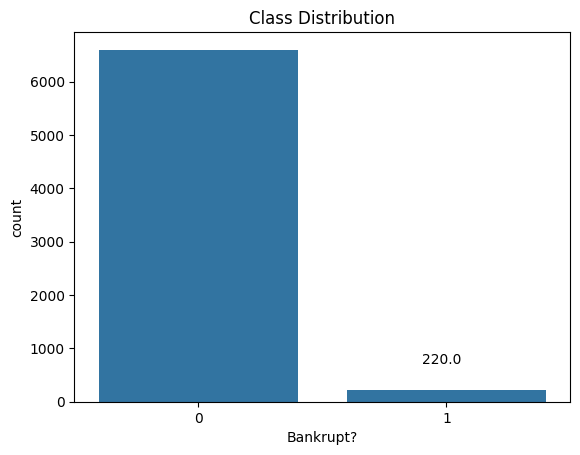

In [7]:
# Plotting the target variable class distribution
bankr=sns.countplot(data=data,x="Bankrupt?")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
plt.title('Class Distribution')
bankr

In [8]:
# Checking the class distributon of target variable 
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

The target variable is highly imbalanced.

Now, plotting the most imbalanced variable/feature in the dataset. 

 Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64


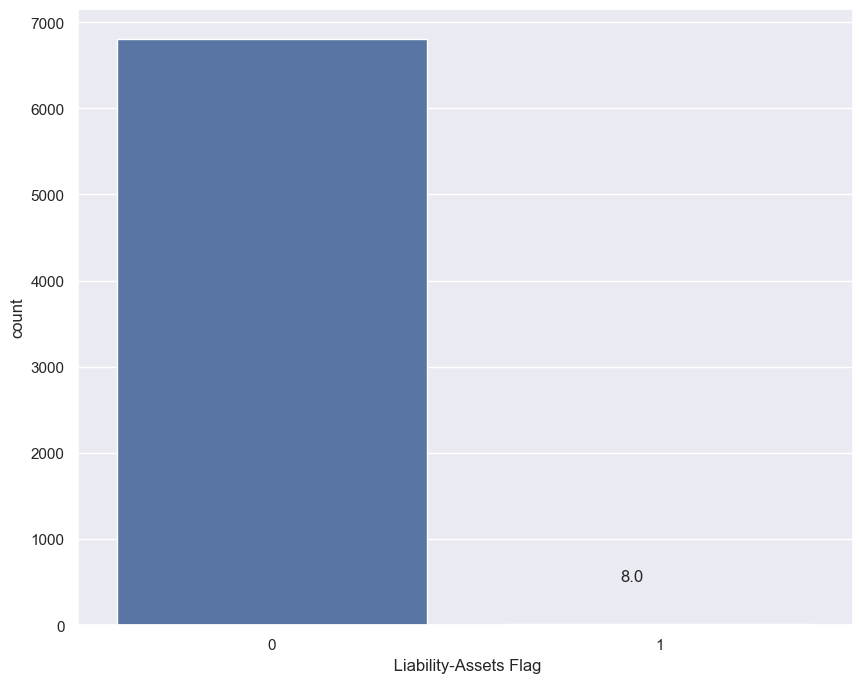

In [9]:
sns.set(rc = {'figure.figsize':(10,8)})
class_bar=sns.countplot(data=data,x=' Liability-Assets Flag')
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar
print(data[' Liability-Assets Flag'].value_counts())

In [10]:
data[' Liability-Assets Flag'].value_counts()

 Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

In [11]:
# Dropping the most imbalanced feature
data.drop(columns=[' Liability-Assets Flag'],axis=1,inplace =True)
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [12]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


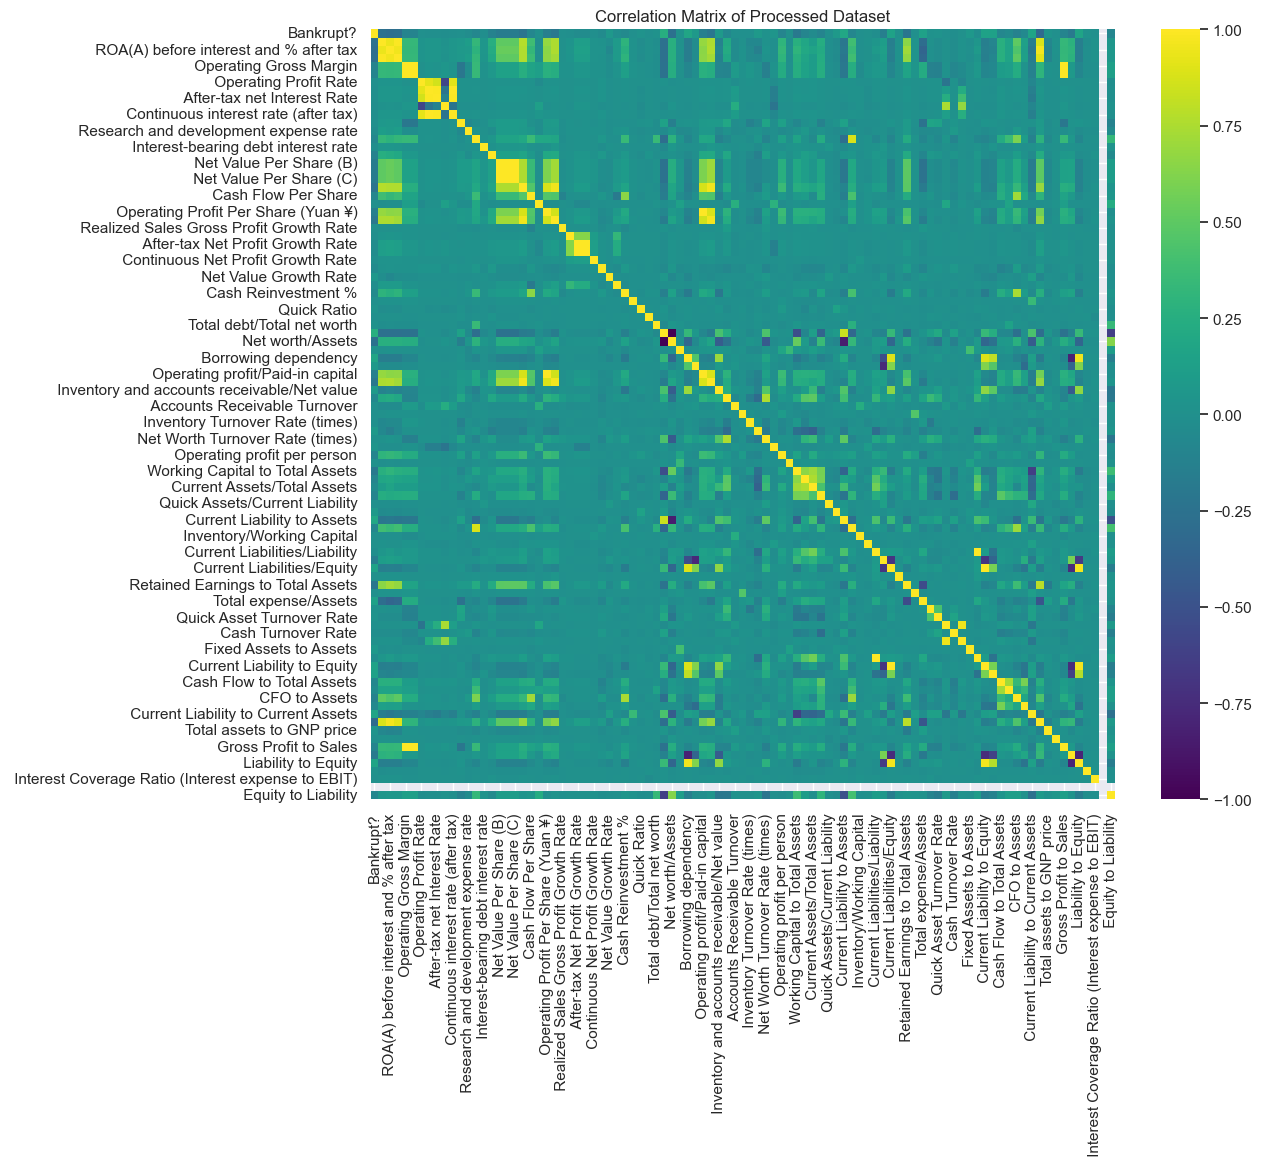

In [13]:
# Computing the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="viridis", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Processed Dataset")
plt.show()

Performing Feature Importance on the dataset to get top 10 most important features.

                                     Feature  Importance
29                     Net Value Growth Rate    0.032166
18   Persistent EPS in the Last Four Seasons    0.031446
88        Net Income to Stockholder's Equity    0.025035
42     Net profit before tax/Paid-in capital    0.024009
90        Degree of Financial Leverage (DFL)    0.020257
..                                       ...         ...
49           Net Worth Turnover Rate (times)    0.005413
69                      Total expense/Assets    0.005122
40          Contingent liabilities/Net worth    0.004566
14                              Tax rate (A)    0.002175
92                           Net Income Flag    0.000000

[94 rows x 2 columns]


<Figure size 1000x800 with 0 Axes>

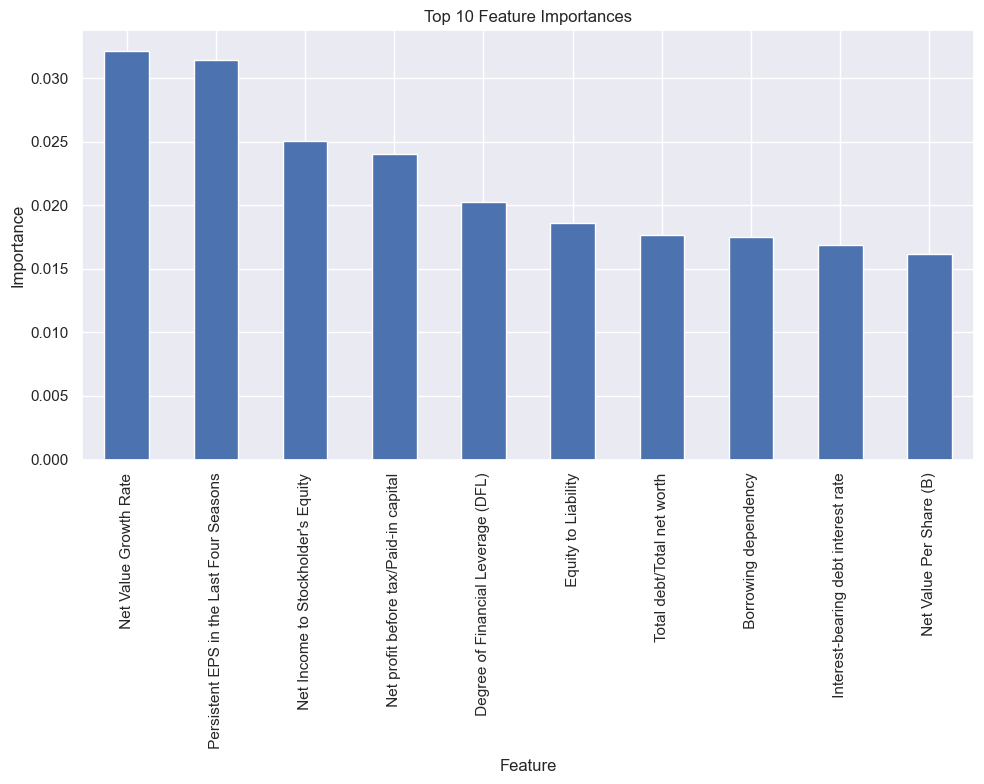

In [14]:
# Ensuring features (X) and target (y) are separated
X = data.drop(columns=["Bankrupt?"], errors="ignore")
y = data["Bankrupt?"]

# Training a RandomForestClassifier for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 8))
feature_importances.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [16]:
# Splitting the data again
X = data.drop(columns=["Bankrupt?"], errors="ignore")
y = data["Bankrupt?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

As the dataset is highly imbalanced, we need to balance it by applying SMOTE Analysis to the training dataset. 

In [ ]:
# Applying SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train models and evaluate
results = {}

Now again checking feature importance after applying SMOTE Analysis.

Feature Importances After SMOTE:
                                     Feature  Importance
7                After-tax net Interest Rate    0.066954
9       Continuous interest rate (after tax)    0.063602
6                  Pre-tax net Interest Rate    0.047365
84                Net Income to Total Assets    0.043564
35                Total debt/Total net worth    0.040768
..                                       ...         ...
81                             CFO to Assets    0.002452
23   Realized Sales Gross Profit Growth Rate    0.002445
72            Working capitcal Turnover Rate    0.002325
64                    Working Capital/Equity    0.002263
92                           Net Income Flag    0.000000

[94 rows x 2 columns]


<Figure size 1000x800 with 0 Axes>

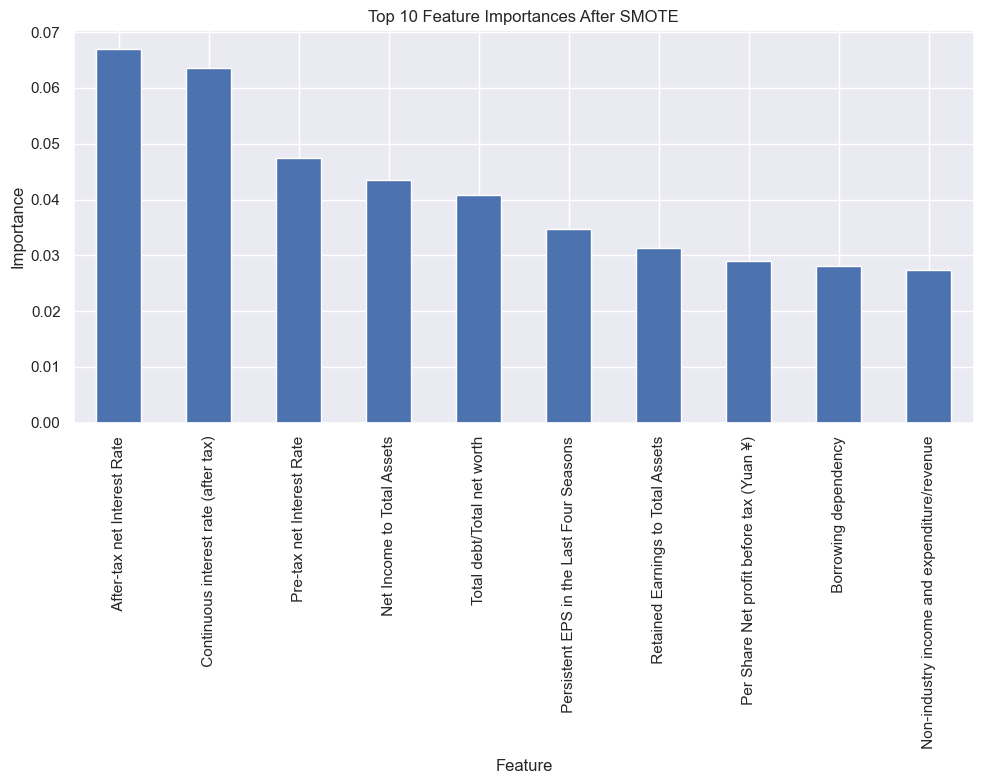

In [18]:
# Training a RandomForestClassifier on the SMOTE-resampled dataset for feature importance
rf_feature_importance = RandomForestClassifier(random_state=42)
rf_feature_importance.fit(X_train_resampled, y_train_resampled)

# Extracting feature importances
feature_importances_smote = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importance.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances After SMOTE:")
print(feature_importances_smote)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
feature_importances_smote.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances After SMOTE")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

### 1. Logistic Regression

Applying Logistic Regression on the dataset after applying SMOTE.

In [20]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)

print(f"Logistic Regression Accuracy (After SMOTE): {accuracy_log}")
print("Logistic Regression Classification Report (After SMOTE):")
print(classification_rep_log)

Logistic Regression Accuracy (After SMOTE): 0.7644183773216031
Logistic Regression Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1968
           1       0.08      0.47      0.13        78

    accuracy                           0.76      2046
   macro avg       0.53      0.63      0.50      2046
weighted avg       0.94      0.76      0.84      2046



<Figure size 800x600 with 0 Axes>

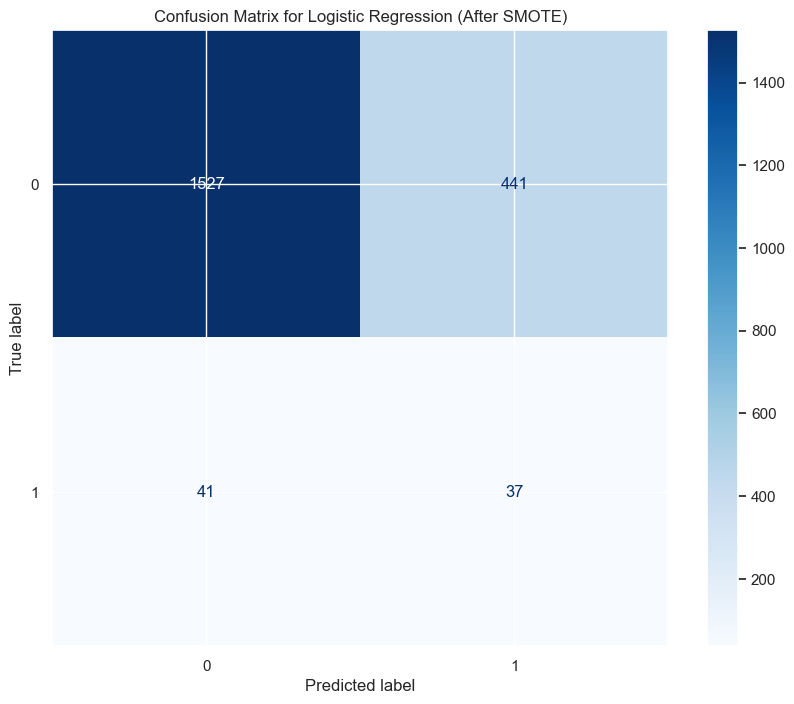

In [21]:
# Generating and plotting the confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression (After SMOTE)")
plt.show()

Now applying PCA on the training dataset Post-SMOTE Analysis with 95% retain variance and then applying Logistic Regression on it.

In [22]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_resampled)  
X_test_scaled = scaler.transform(X_test)  

pca = PCA(n_components=0.95)
X_train_smote_pca = pca.fit_transform(X_train_smote_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg_pca = LogisticRegression(max_iter=1000, random_state=42)
log_reg_pca.fit(X_train_smote_pca, y_train_resampled)
y_pred_log_pca = log_reg_pca.predict(X_test_pca)
accuracy_log_pca = accuracy_score(y_test, y_pred_log_pca)
classification_rep_log_pca = classification_report(y_test, y_pred_log_pca)

print(f"Logistic Regression Accuracy (After PCA + SMOTE): {accuracy_log_pca}")
print("Logistic Regression Classification Report (After PCA + SMOTE):")
print(classification_rep_log_pca)

Logistic Regression Accuracy (After PCA + SMOTE): 0.8729227761485826
Logistic Regression Classification Report (After PCA + SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1968
           1       0.20      0.77      0.32        78

    accuracy                           0.87      2046
   macro avg       0.59      0.82      0.62      2046
weighted avg       0.96      0.87      0.91      2046



<Figure size 800x600 with 0 Axes>

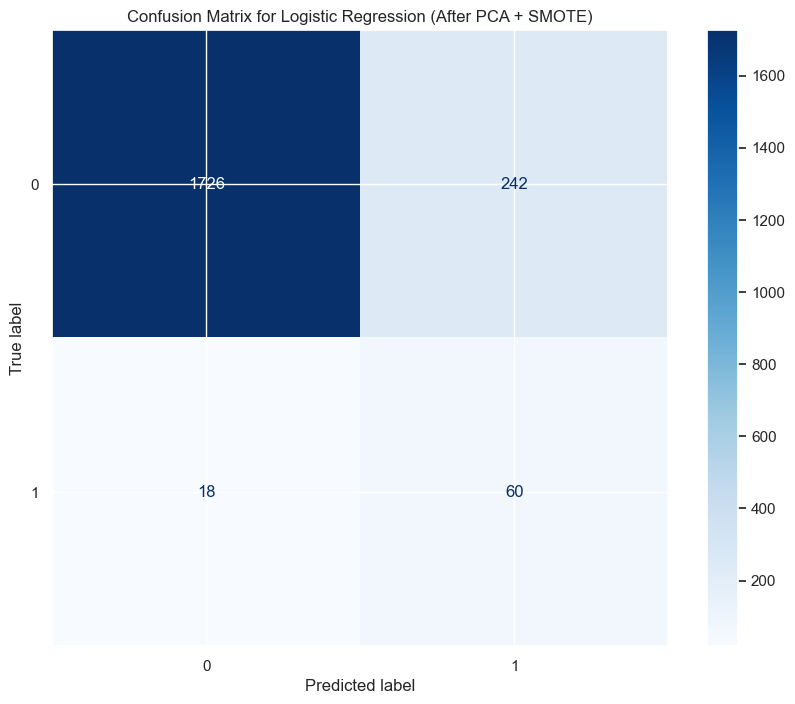

In [23]:
# Generating and plotting the confusion matrix for Logistic Regression for the above code
cm_log_pca_smote = confusion_matrix(y_test, y_pred_log_pca)

plt.figure(figsize=(8, 6))
disp_log_pca_smote = ConfusionMatrixDisplay(confusion_matrix=cm_log_pca_smote, display_labels=[0, 1])
disp_log_pca_smote.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression (After PCA + SMOTE)")
plt.show()

### 2. Decision Tree 

Now we are going to apply Decision Tree Classifier on Post-SMOTE training dataset.

In [24]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_smote.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy (After SMOTE): {accuracy_dt}")
print("Decision Tree Classification Report (After SMOTE):")
print(classification_rep_dt)

Decision Tree Accuracy (After SMOTE): 0.9379276637341154
Decision Tree Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1968
           1       0.27      0.37      0.31        78

    accuracy                           0.94      2046
   macro avg       0.62      0.67      0.64      2046
weighted avg       0.95      0.94      0.94      2046



<Figure size 800x600 with 0 Axes>

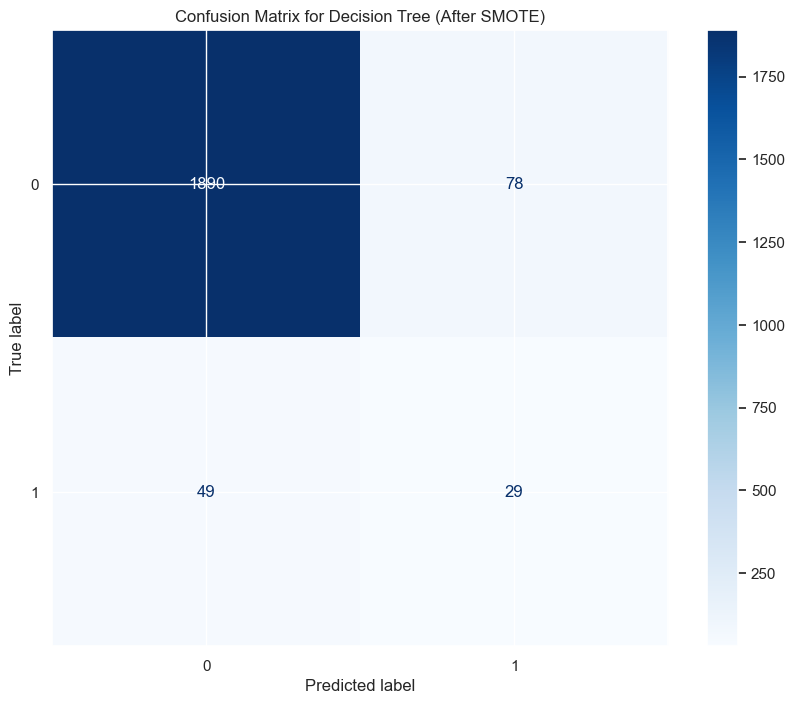

In [25]:
# Generating and plotting the confusion matrix for Decision Tree Classifier for above code
cm_dt_smote = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
disp_dt_smote = ConfusionMatrixDisplay(confusion_matrix=cm_dt_smote, display_labels=[0, 1])
disp_dt_smote.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Decision Tree (After SMOTE)")
plt.show()

Now, applying PCA on the training dataset Post-SMOTE Analysis with 95% retain variance and then applying Decision Tree model on it.

In [26]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_resampled)  
X_test_scaled = scaler.transform(X_test)  

pca = PCA(n_components=0.95)
X_train_smote_pca = pca.fit_transform(X_train_smote_scaled)
X_test_pca = pca.transform(X_test_scaled)

dt_smote_pca = DecisionTreeClassifier(random_state=42)
dt_smote_pca.fit(X_train_smote_pca, y_train_resampled)
y_pred_smote_pca_dt = dt_smote_pca.predict(X_test_pca)
accuracy_smote_pca_dt = accuracy_score(y_test, y_pred_smote_pca_dt)
classification_rep_smote_pca_dt = classification_report(y_test, y_pred_smote_pca_dt)

print(f"Decision Tree Accuracy (After PCA + SMOTE): {accuracy_smote_pca_dt}")
print("Decision Tree Classification Report (After PCA + SMOTE):")
print(classification_rep_smote_pca_dt)

Decision Tree Accuracy (After PCA + SMOTE): 0.9120234604105572
Decision Tree Classification Report (After PCA + SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1968
           1       0.20      0.44      0.27        78

    accuracy                           0.91      2046
   macro avg       0.59      0.68      0.61      2046
weighted avg       0.95      0.91      0.93      2046



<Figure size 800x600 with 0 Axes>

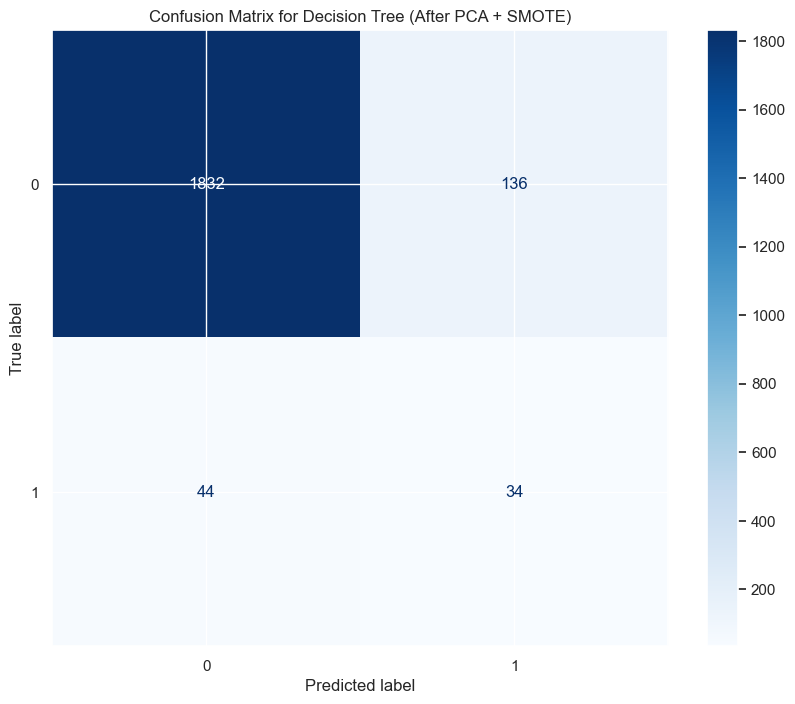

In [27]:
# Generating and plotting the confusion matrix for Decision Tree model for above code
cm_smote_pca_dt = confusion_matrix(y_test, y_pred_smote_pca_dt)
plt.figure(figsize=(8, 6))
disp_smote_pca_dt = ConfusionMatrixDisplay(confusion_matrix=cm_smote_pca_dt, display_labels=[0, 1])
disp_smote_pca_dt.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Decision Tree (After PCA + SMOTE)")
plt.show()

### 3. Random Forest

We are training a Random Forest model Post-SMOTE training dataset.

In [28]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

y_pred_rf_smote = rf_smote.predict(X_test)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
classification_rep_rf_smote = classification_report(y_test, y_pred_rf_smote)

print(f"Random Forest Accuracy (After SMOTE): {accuracy_rf_smote}")
print("Random Forest Classification Report (After SMOTE):")
print(classification_rep_rf_smote)

Random Forest Accuracy (After SMOTE): 0.9565004887585533
Random Forest Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.44      0.51      0.47        78

    accuracy                           0.96      2046
   macro avg       0.71      0.74      0.73      2046
weighted avg       0.96      0.96      0.96      2046



<Figure size 800x600 with 0 Axes>

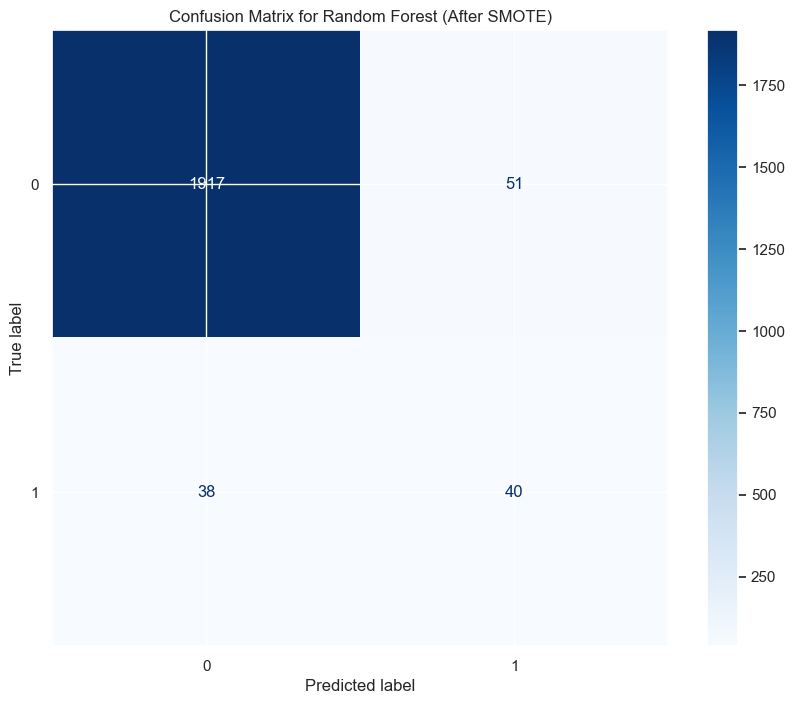

In [29]:
# Generating and plotting the confusion matrix for Random Forest after SMOTE data
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

plt.figure(figsize=(8, 6))
disp_rf_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote, display_labels=[0, 1])
disp_rf_smote.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Random Forest (After SMOTE)")
plt.show()

Applying PCA on the training dataset Post-SMOTE Analysis with 95% retain variance and then applying Random Forest model on it.

In [30]:
# Step 1: Standardize the SMOTE-resampled training data and the test data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_resampled)  # Standardize SMOTE-balanced training data
X_test_scaled = scaler.transform(X_test)  # Standardize the test data

# Step 2: Apply PCA on SMOTE-balanced data (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_smote_pca = pca.fit_transform(X_train_smote_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train Random Forest on the PCA-transformed, SMOTE-balanced data
rf_smote_pca = RandomForestClassifier(random_state=42)
rf_smote_pca.fit(X_train_smote_pca, y_train_resampled)

# Step 4: Make predictions on the original test set
y_pred_rf_smote_pca = rf_smote_pca.predict(X_test_pca)

# Step 5: Evaluate the Random Forest model
accuracy_rf_smote_pca = accuracy_score(y_test, y_pred_rf_smote_pca)
classification_rep_rf_smote_pca = classification_report(y_test, y_pred_rf_smote_pca)

# Print results
print(f"Random Forest Accuracy (After PCA + SMOTE): {accuracy_rf_smote_pca}")
print("Random Forest Classification Report (After PCA + SMOTE):")
print(classification_rep_rf_smote_pca)

Random Forest Accuracy (After PCA + SMOTE): 0.9457478005865103
Random Forest Classification Report (After PCA + SMOTE):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1968
           1       0.31      0.35      0.33        78

    accuracy                           0.95      2046
   macro avg       0.64      0.66      0.65      2046
weighted avg       0.95      0.95      0.95      2046



<Figure size 800x600 with 0 Axes>

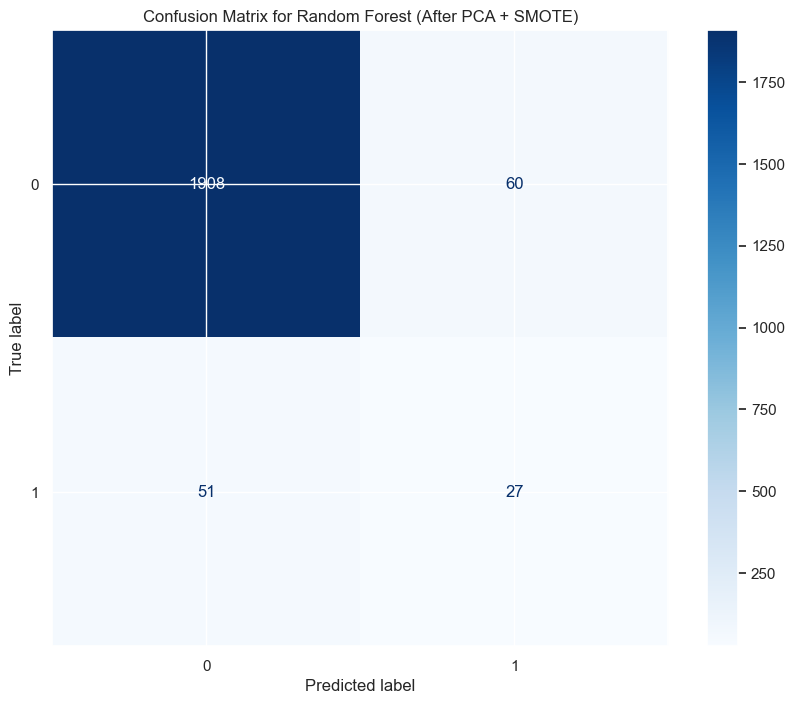

In [32]:
# Plotting confusion matrix for above code
cm_rf_smote_pca = confusion_matrix(y_test, y_pred_rf_smote_pca)
plt.figure(figsize=(8, 6))
disp_rf_smote_pca = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote_pca, display_labels=[0, 1])
disp_rf_smote_pca.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Random Forest (After PCA + SMOTE)")
plt.show()

### 4. XGBoost 

Training XGBoost on the SMOTE-resampled training set.

In [33]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(classification_rep_xgb)

XGBoost Accuracy: 0.9648093841642229
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1968
           1       0.55      0.42      0.48        78

    accuracy                           0.96      2046
   macro avg       0.76      0.70      0.73      2046
weighted avg       0.96      0.96      0.96      2046



<Figure size 800x600 with 0 Axes>

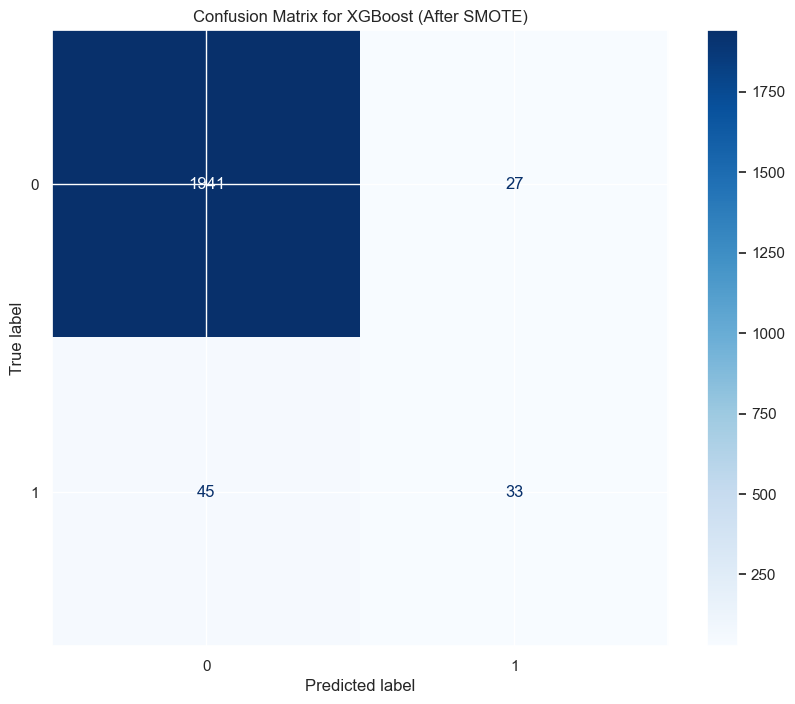

In [34]:
# Plotting confusion matrix for the above code
cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
disp_xgb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote, display_labels=[0, 1])
disp_xgb_smote.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for XGBoost (After SMOTE)")
plt.show()

Applying PCA on the training SMOTE balance dataset with 95% retain variance and then applying XGBoost model on it.

In [35]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_resampled)  
X_test_scaled = scaler.transform(X_test) 

pca = PCA(n_components=0.95)
X_train_smote_pca = pca.fit_transform(X_train_smote_scaled)
X_test_pca = pca.transform(X_test_scaled)

xgb_pca = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_pca.fit(X_train_smote_pca, y_train_resampled)
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)
accuracy_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)
classification_rep_xgb_pca = classification_report(y_test, y_pred_xgb_pca)

print(f"XGBoost Accuracy (After PCA + SMOTE): {accuracy_xgb_pca}")
print("XGBoost Classification Report (After PCA + SMOTE):")
print(classification_rep_xgb_pca)

XGBoost Accuracy (After PCA + SMOTE): 0.944770283479961
XGBoost Classification Report (After PCA + SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1968
           1       0.33      0.44      0.38        78

    accuracy                           0.94      2046
   macro avg       0.65      0.70      0.67      2046
weighted avg       0.95      0.94      0.95      2046



<Figure size 800x600 with 0 Axes>

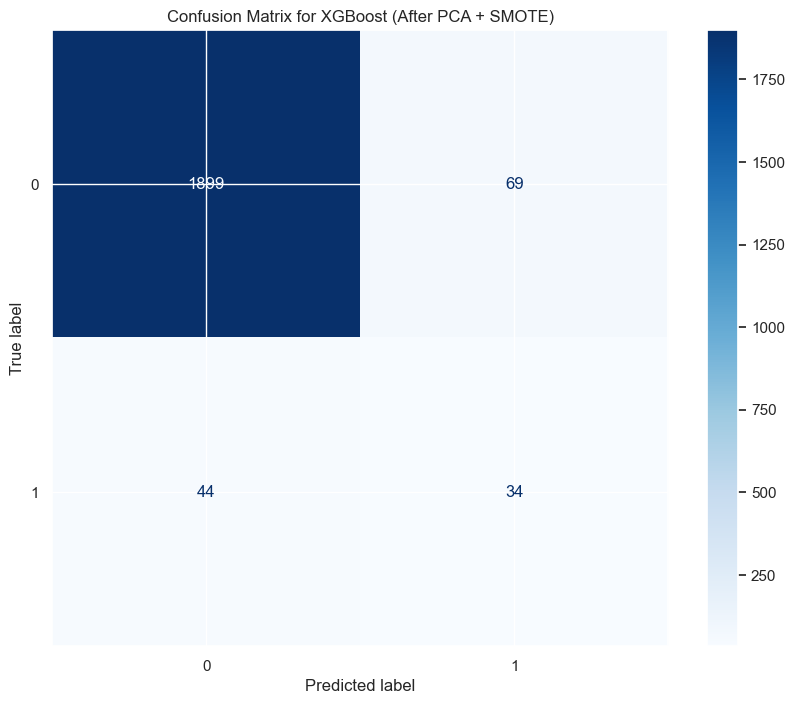

In [36]:
# Plotting the confusion matrix for above code
cm_xgb_pca_smote = confusion_matrix(y_test, y_pred_xgb_pca)
plt.figure(figsize=(8, 6))
disp_xgb_pca_smote = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_pca_smote, display_labels=[0, 1])
disp_xgb_pca_smote.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for XGBoost (After PCA + SMOTE)")
plt.show()